Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data',index_col="ID#")
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [3]:
df.isna().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [4]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

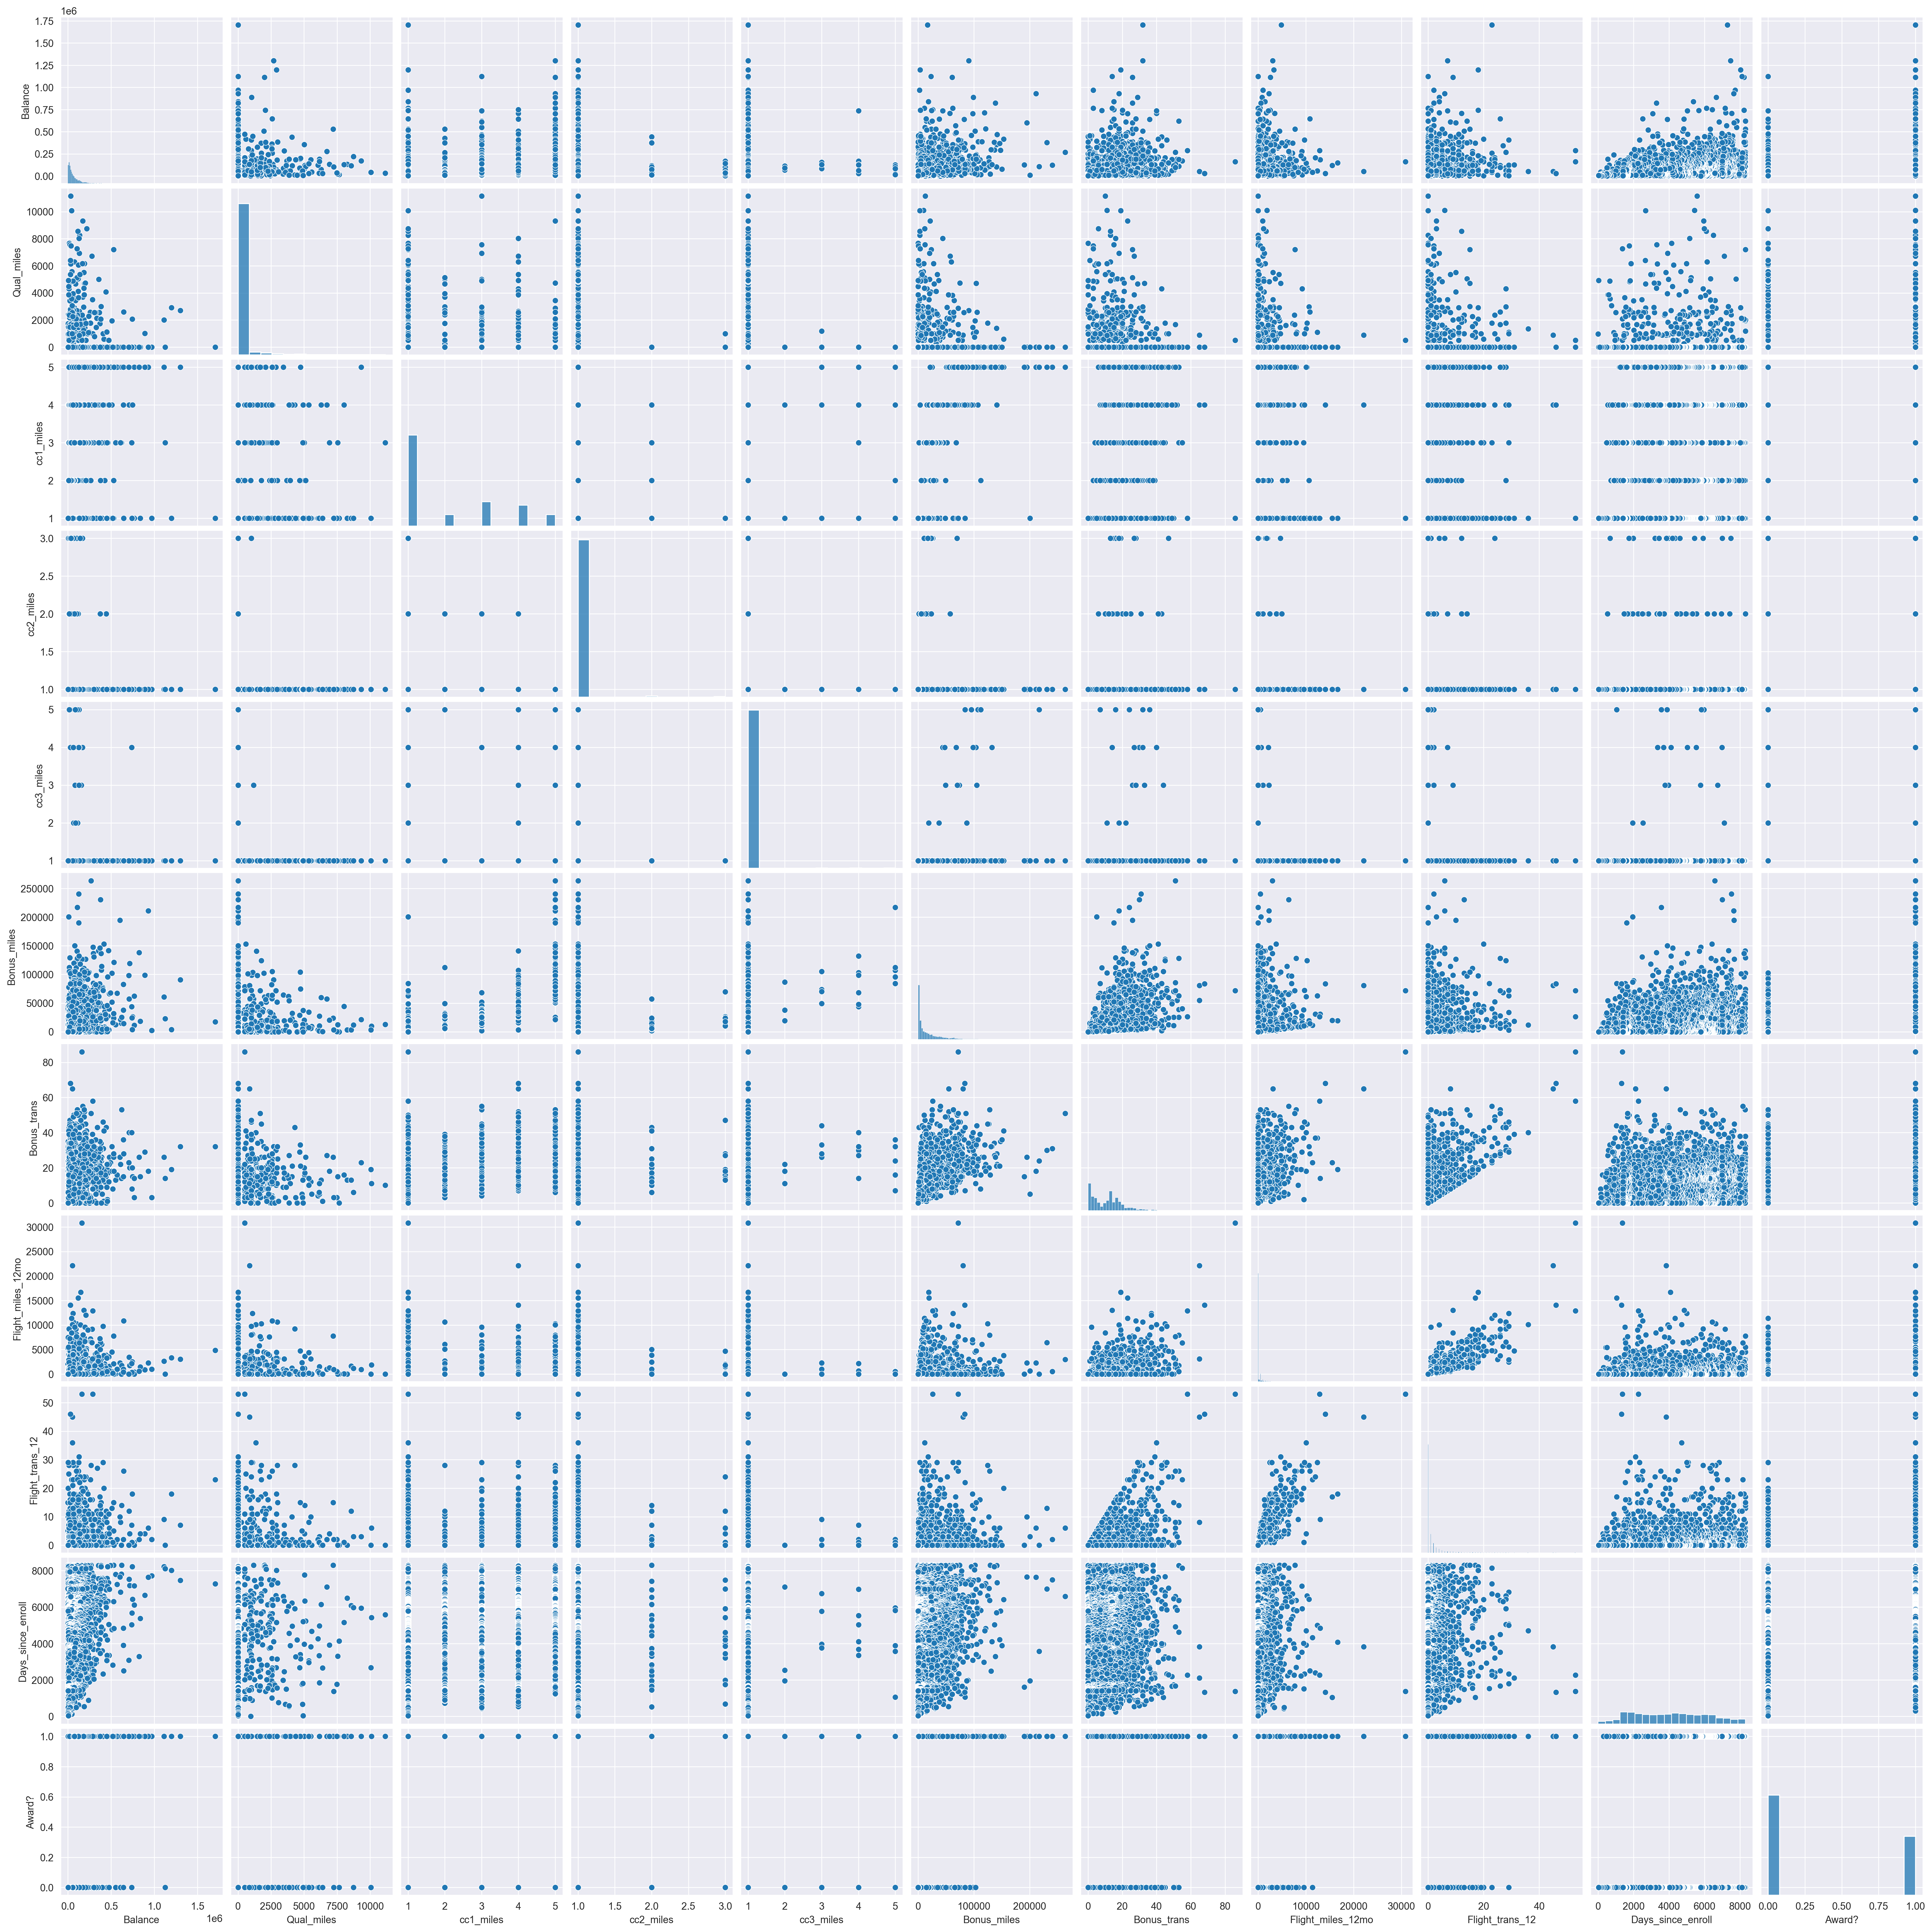

In [5]:
sns.pairplot(df)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

stdscale=StandardScaler()
scaledf=stdscale.fit_transform(df)
x=pd.DataFrame(columns=df.columns,data=scaledf)
x.head()
x.describe()

Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   5.756558e-16 -7.588884e-17  9.288838e-15 -7.447781e-16 -4.371208e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03       3.999000e+03     3.999000e+03   
mean  -5.515024e-16 -2.877696e-15       5.781822e-16    -1.206323e-15   
std    1.000125e+00  1.000125e+00       1.000125e+00     1.000125e+00   
min   -7.099918e-01 -1.208203e+00      -3.286033e-01    -3.621679e-01   
25%   -6.582276e-01 -8.957878e-01      -3.286033e-01    -3.621679e-01   
50%   -4.130308e-01  4.145743e-02      -3.286033e-01    -3.621679e-01   
75%    2.756198e-01  5.621492e-01      -1.064658e-01    -9.850333e-02   
max    1.020957e+01  7.747696e+00       2.168300e+01     1.361205e+01   

       Days_since_enroll        Award?  
count       3.999000e+03  3.999000e+03  
mean        1.406727e-15 -3.352657e-15  
std         1.000125e+00  1.000125e+00  
min        -1.993611e+00 -7.669193e-01  
25%        -8.661823e-01 -7.669193e-01  
50%        -1.092530e-02 -7.669193e-01  
75%         8.097050e-01  1.303918e+00  
max         2.023095e+00  1.303918e+00

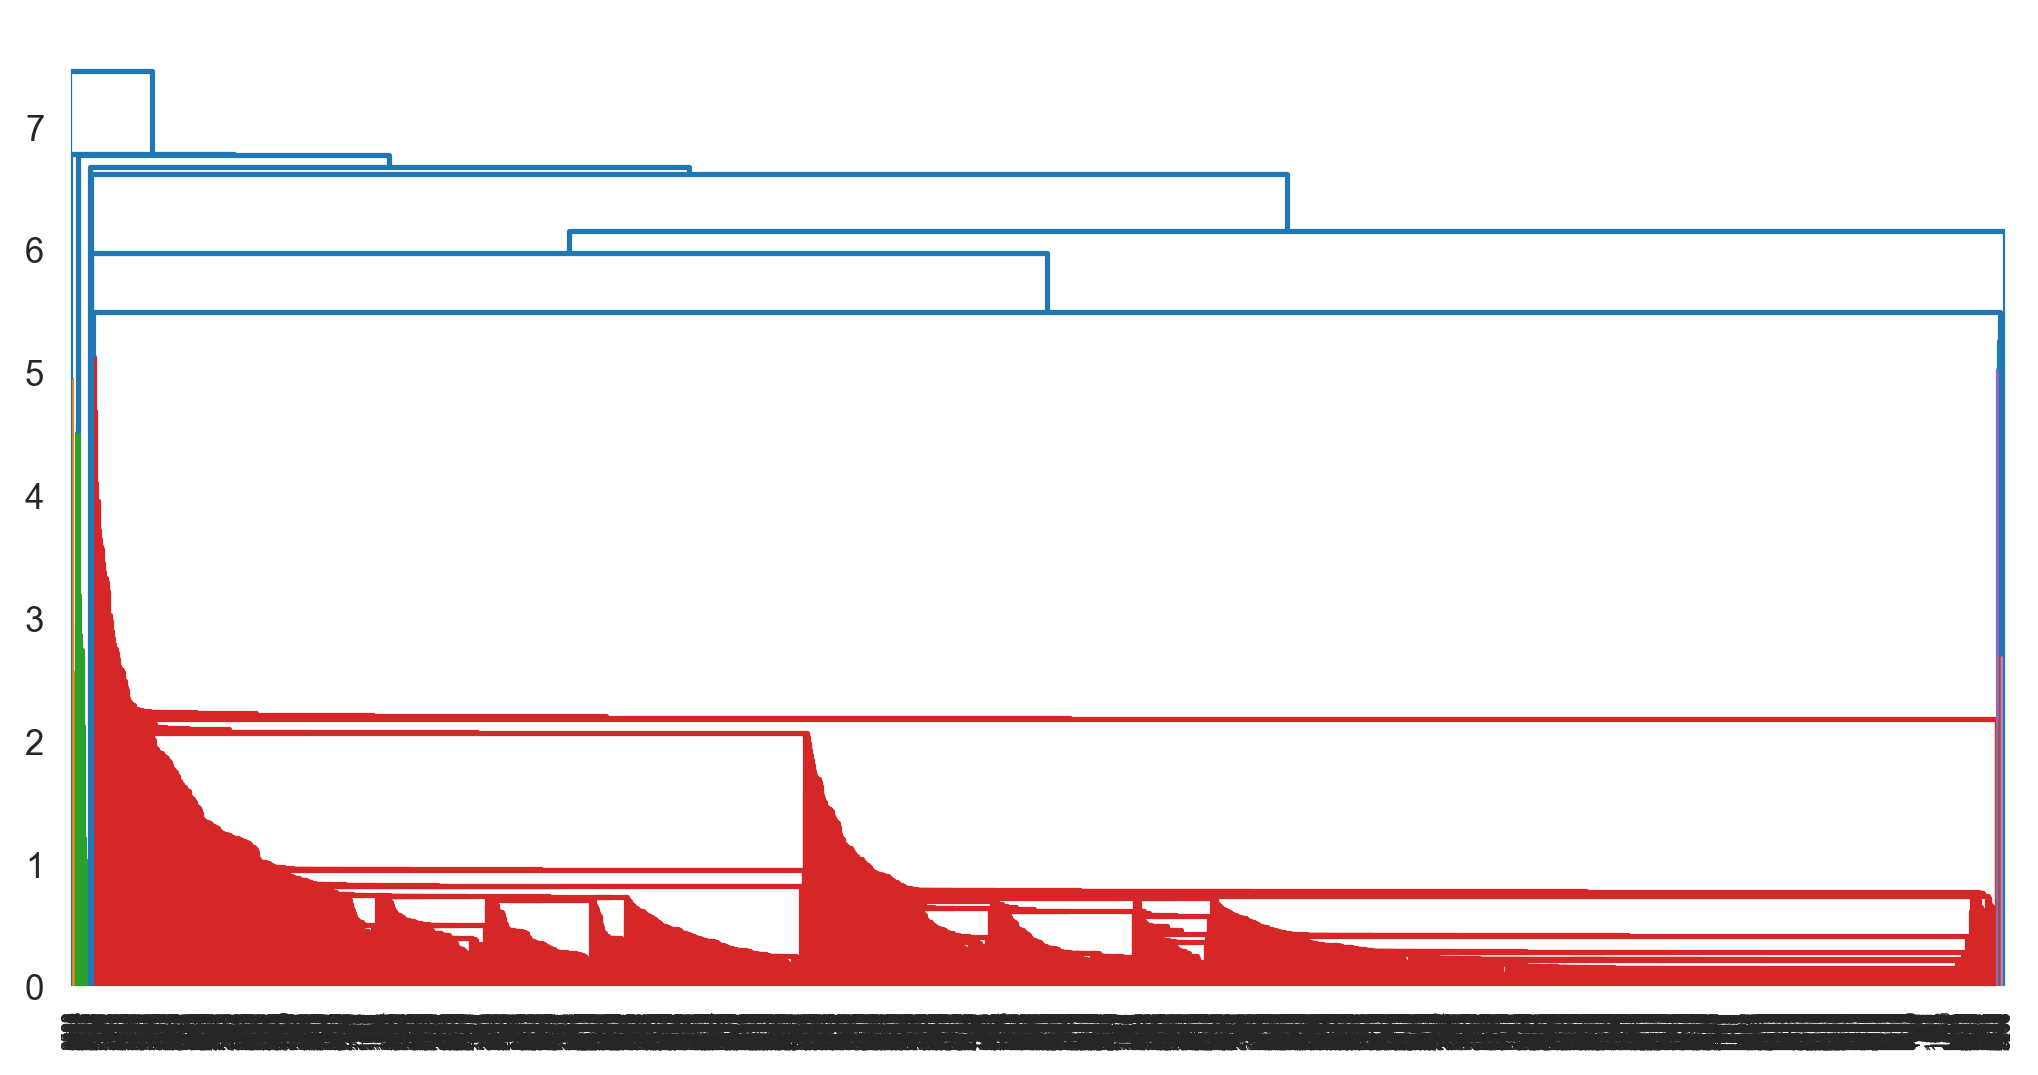

In [7]:
from scipy.cluster import hierarchy
lg=hierarchy.linkage(x,method='single')
dn = hierarchy.dendrogram(lg)

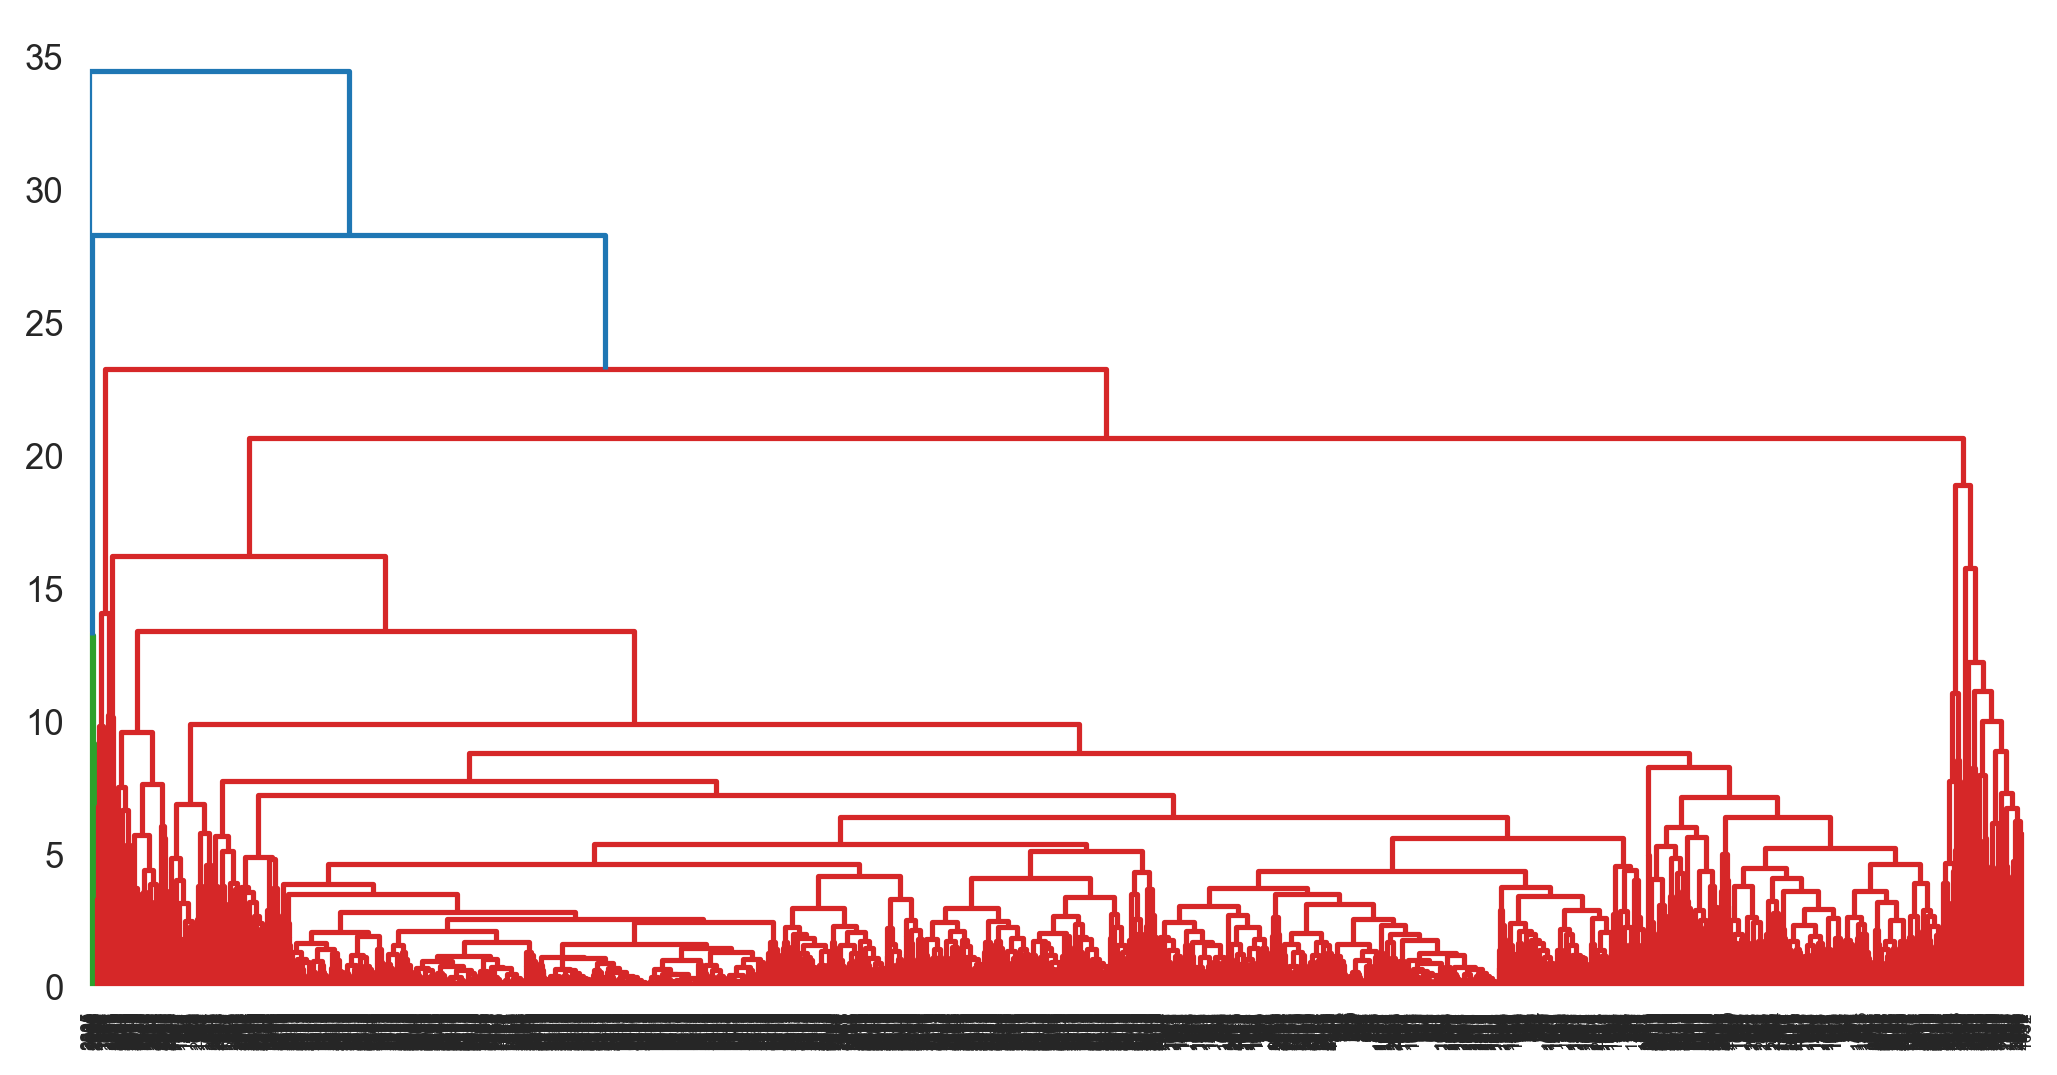

In [8]:
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)
# plt.axhline(y = 7 , c = 'red', linestyle = '--')

# MODEL BUILDING

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)

y = hc.fit_predict(x)
df['Cluster'] = y
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  Cluster  
ID#                    
1          0        0  
2          0        0  
3          0        0  
4          0        0  
5          1        1  
...      ...      ...  
4017       1        0  
4018       1        0  
4019       1        1  
4020       0        0  
4021       0        0  

[3999 rows x 12 columns]

In [10]:
df.groupby('Cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                               
0         46718.863399    9.274407   1.242266   1.023303   1.000000   
1        116314.450725  363.839130   3.498551   1.000000   1.035507   
2        134880.892308  393.323077   2.430769   1.000000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0         5037.792688     7.091201         221.167135         0.700281   
1        37150.356522    18.066667         377.000000         1.150000   
2        36582.169231    29.338462        5915.523077        16.638462   

         Days_since_enroll    Award?  
Cluster                               
0              3772.785858  0.188027  
1              4696.888406  0.663043  
2              4599.607692  0.753846

<AxesSubplot:xlabel='Bonus_trans', ylabel='Flight_miles_12mo'>

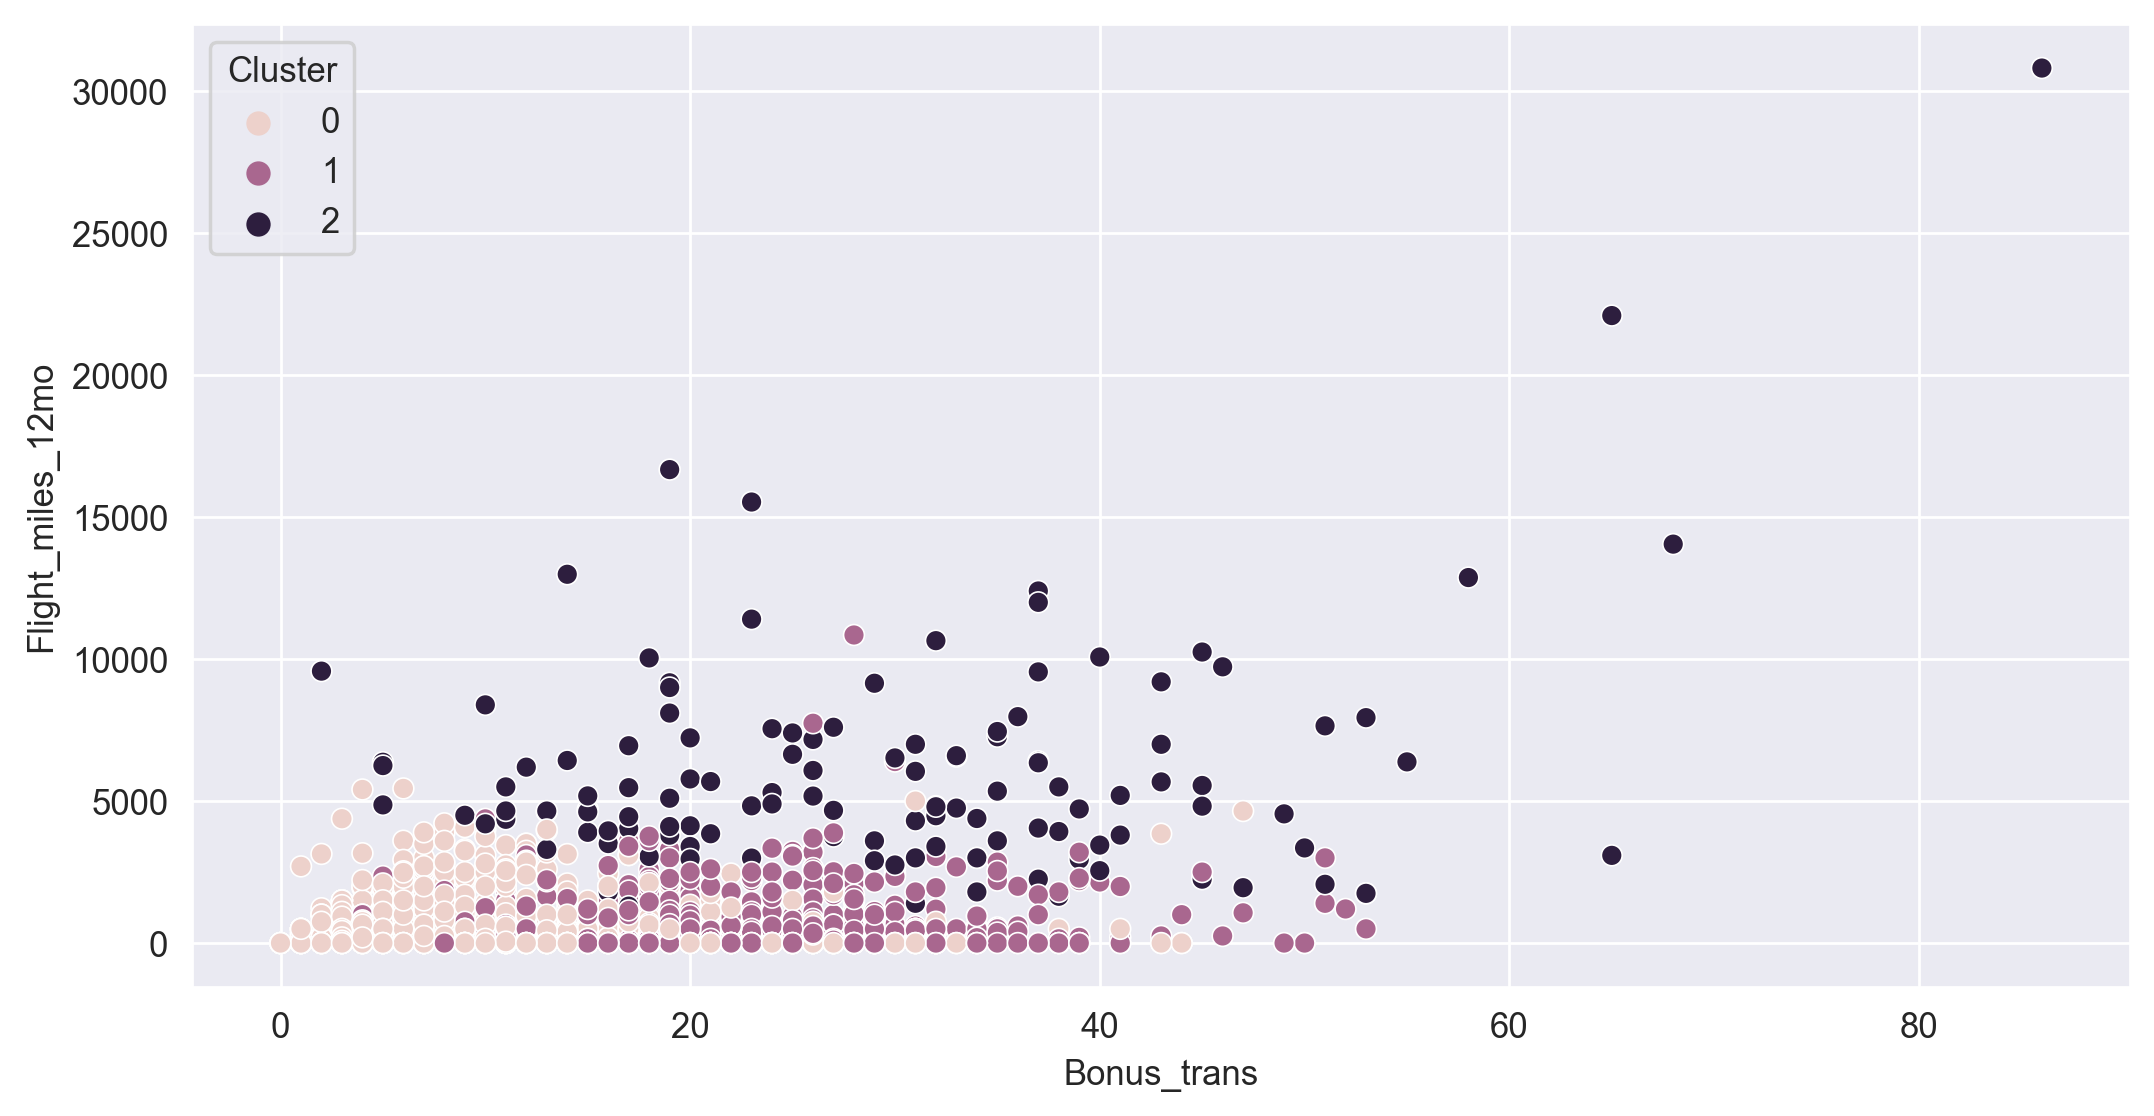

In [11]:
sns.scatterplot(df['Bonus_trans'], df['Flight_miles_12mo'], hue = df['Cluster'])

Inference:Based on these average values, we can make the following observations:

Cluster 0: This cluster has lower average values for most of the features compared to the other clusters. Customers in this cluster tend to have lower balances, fewer qualifying miles, lower credit card usage (cc1_miles), and fewer flight miles and transactions in the last 12 months. They also have a lower likelihood of earning an award.

Cluster 1: This cluster has relatively higher average values for most features, indicating higher levels of engagement. Customers in this cluster have higher account balances, more qualifying miles, and higher credit card usage (cc1_miles). They also have a higher number of flight miles and transactions in the last 12 months. They have a relatively higher likelihood of earning an award.

Cluster 2: This cluster has the highest average values for most features. Customers in this cluster tend to have the highest account balances, the most qualifying miles, and moderate credit card usage (cc1_miles). They also have the highest number of flight miles and transactions in the last 12 months, indicating a higher level of engagement. They have a relatively higher likelihood of earning an award.

NOTE: These inference is made on the average values of features within each cluster. It's important to consider the context of the data and domain knowledge to gain a deeper understanding of the underlying patterns and implications of the clustering results.

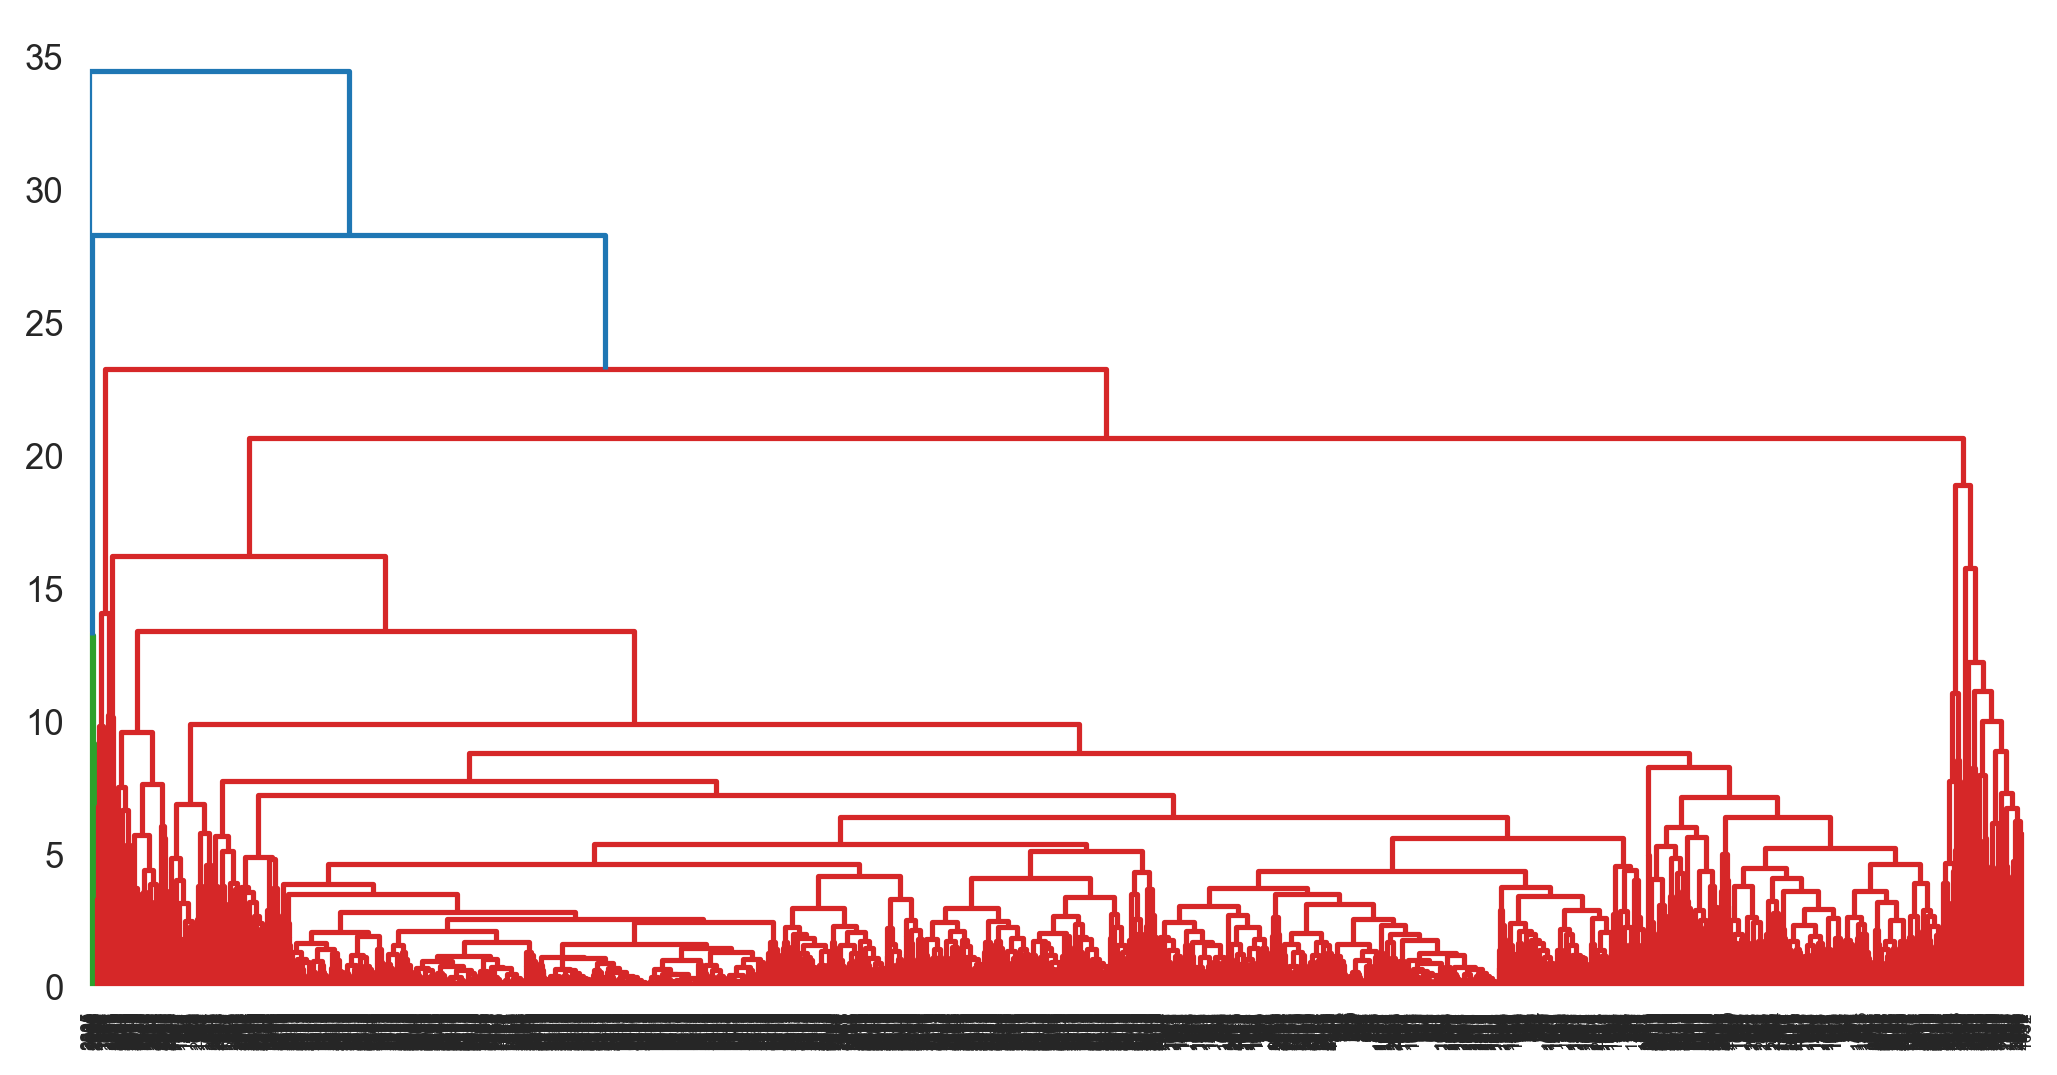

In [12]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
# plt.axhline(y = 4)

In [13]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(x)
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [14]:
df['y'] = y
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  Cluster  y  
ID#                       
1          0        0  1  
2          0        0  1  
3          0        0  1  
4          0        0  1  
5          1        1  0  
...      ...      ... ..  
4017       1        0  1  
4018       1        0  1  
4019       1        1  0  
4020       0        0  1  
4021       0        0  1  

[3999 rows x 13 columns]

In [15]:
df.groupby('y').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
y                                                                             
0  116314.450725  363.839130   3.498551   1.000000   1.035507  37150.356522   
1   46329.336877    9.028618   1.244072   1.000000   1.000000   4868.112428   
2  134880.892308  393.323077   2.430769   1.000000   1.000000  36582.169231   
3   68876.581395   23.255814   1.139535   2.348837   1.000000  14689.837209   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
y                                                                       
0    18.066667         377.000000         1.150000        4696.888406   
1     6.907604         214.812756         0.673753        3769.337694   
2    29.338462        5915.523077        16.638462        4599.607692   
3    17.534884         582.627907         2.209302        3968.930233   

     Award?  Cluster  
y                     
0  0.663043      1.0  
1  0.184383      0.0  
2  0.753846      2.0  
3  0.395349      0.0

<AxesSubplot:xlabel='Bonus_trans', ylabel='Flight_miles_12mo'>

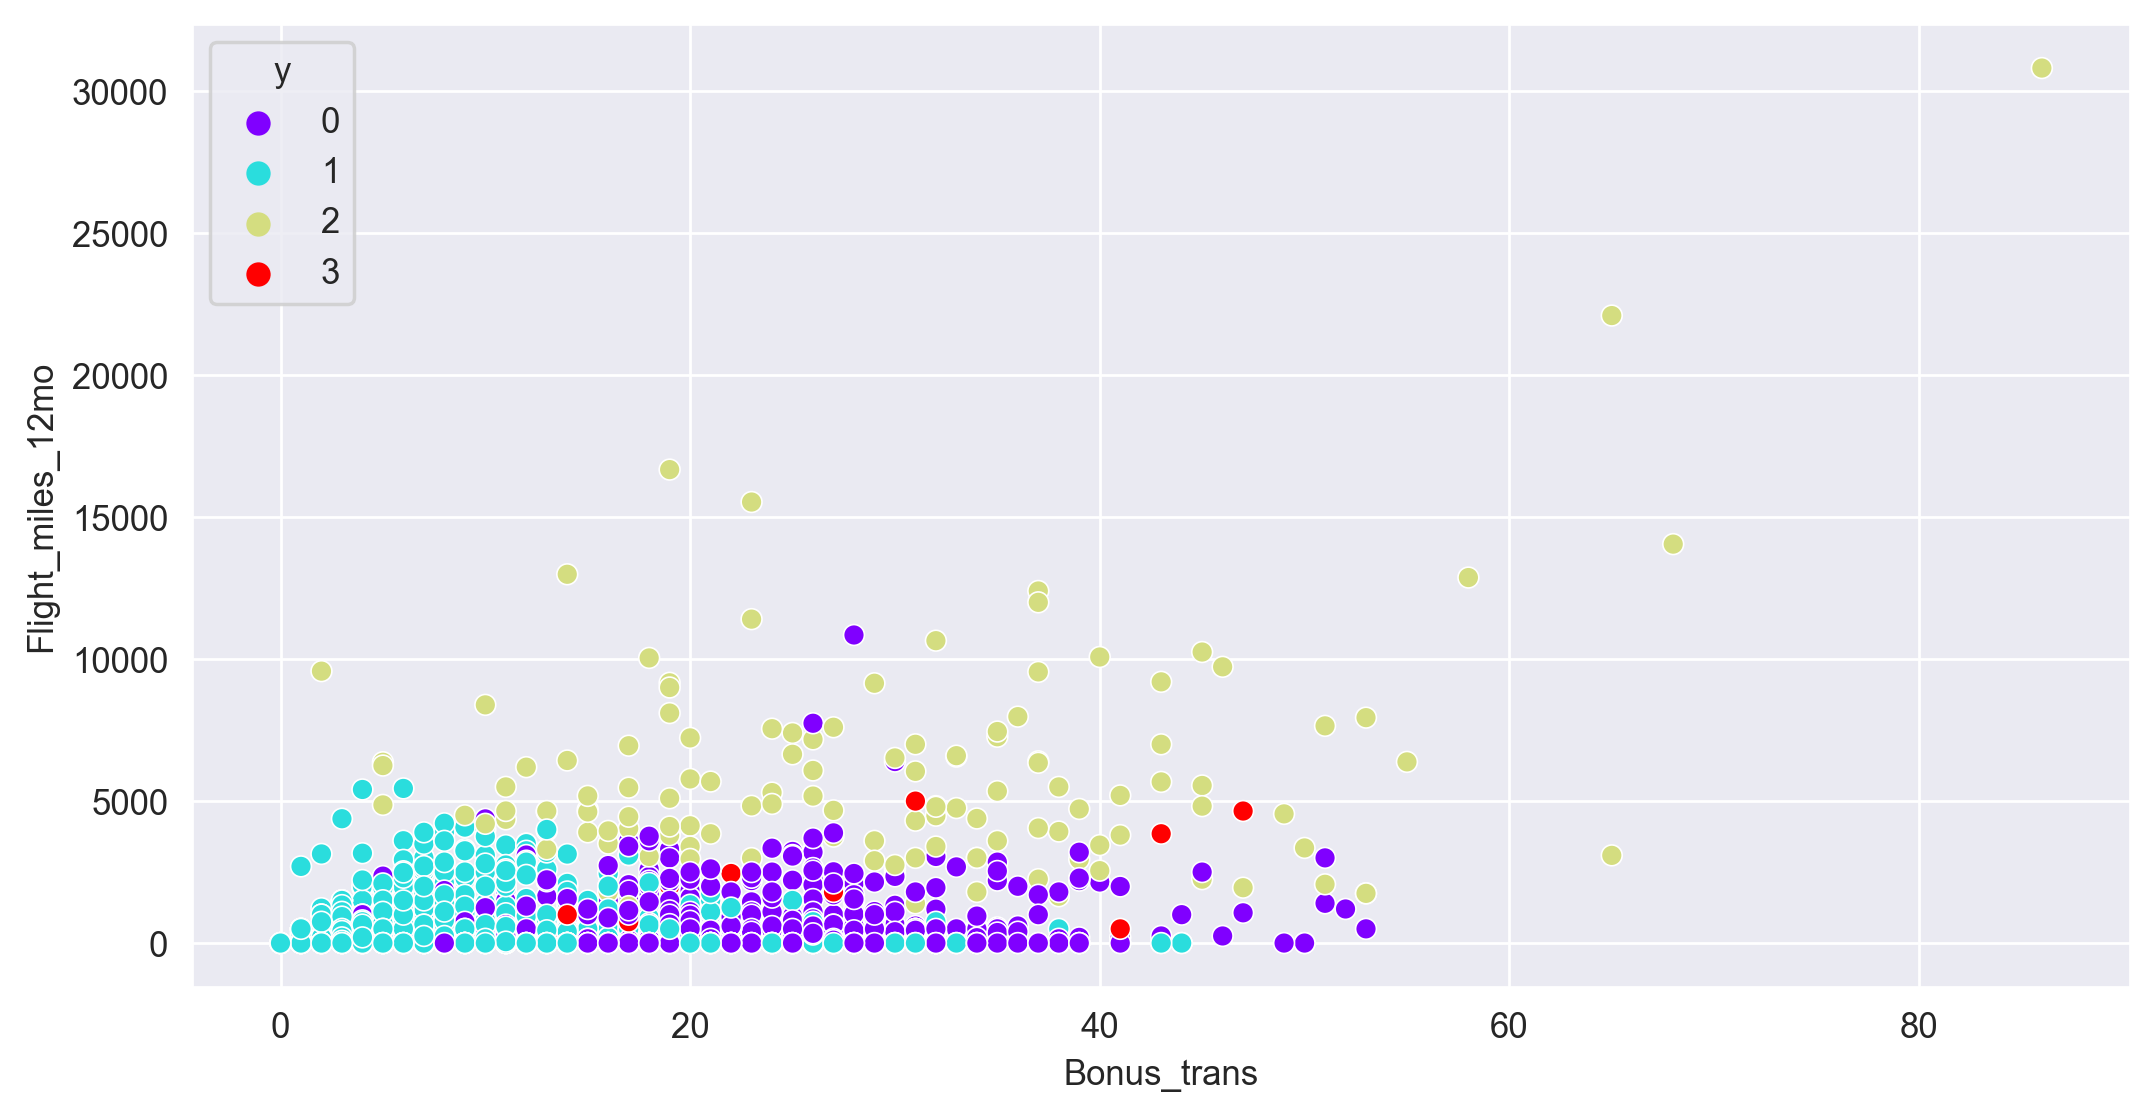

In [16]:
sns.scatterplot(df['Bonus_trans'], df['Flight_miles_12mo'], hue = df['y'], palette='rainbow')

Based on the averages, we can make the following interpretations:

Cluster 0: This cluster represents customers wise second to highest account balances and next to highest engagement in terms of qualifying miles, credit card usage (cc1_miles), flight miles, and transactions. They have a relatively high likelihood of earning an award.

Cluster 1: This cluster represents customers with lower account balances and minimal engagement in terms of qualifying miles, credit card usage, flight miles, and transactions. They have a relatively low likelihood of earning an award.

Cluster 2: This cluster represents customers with high account balances and high engagement in terms of qualifying miles, credit card usage, flight miles, and transactions. They have a relatively high likelihood of earning an award.

Cluster 3: This cluster represents customers wise moderate account balances and moderate engagement in terms of qualifying miles, credit card usage (cc1_miles), flight miles, and transactions. They have a relatively high likelihood of earning an award.


These interpretations are based on the average values of the features within each cluster. Remember that the specific interpretation may vary depending on the context and domain knowledge.